In [3]:
# load environment variable from .env file
from dotenv import load_dotenv
load_dotenv()

True

# **Azure AI Foundry**
https://ai.azure.com/

Requires an Azure Subscription.

## Text to Image Generation

#### Example prompts
- View a magical town from the window of an aeroplane flying low. The town is surrounded by heavenly mountains & huge waterfalls.
- Subject: A small town in the middle of heavenly mountains with massive waterfalls during pleasant sunny weather. Foreground: Magical flowers & plants with butterflies from heaven flying close to these flowers.
- A small town in the middle of heavenly mountains with massive waterfalls with pleasant sunny weather.
- Futuristic neon city at night, cyberpunk style, floating vehicles, holographic advertisements, rain-slicked streets.

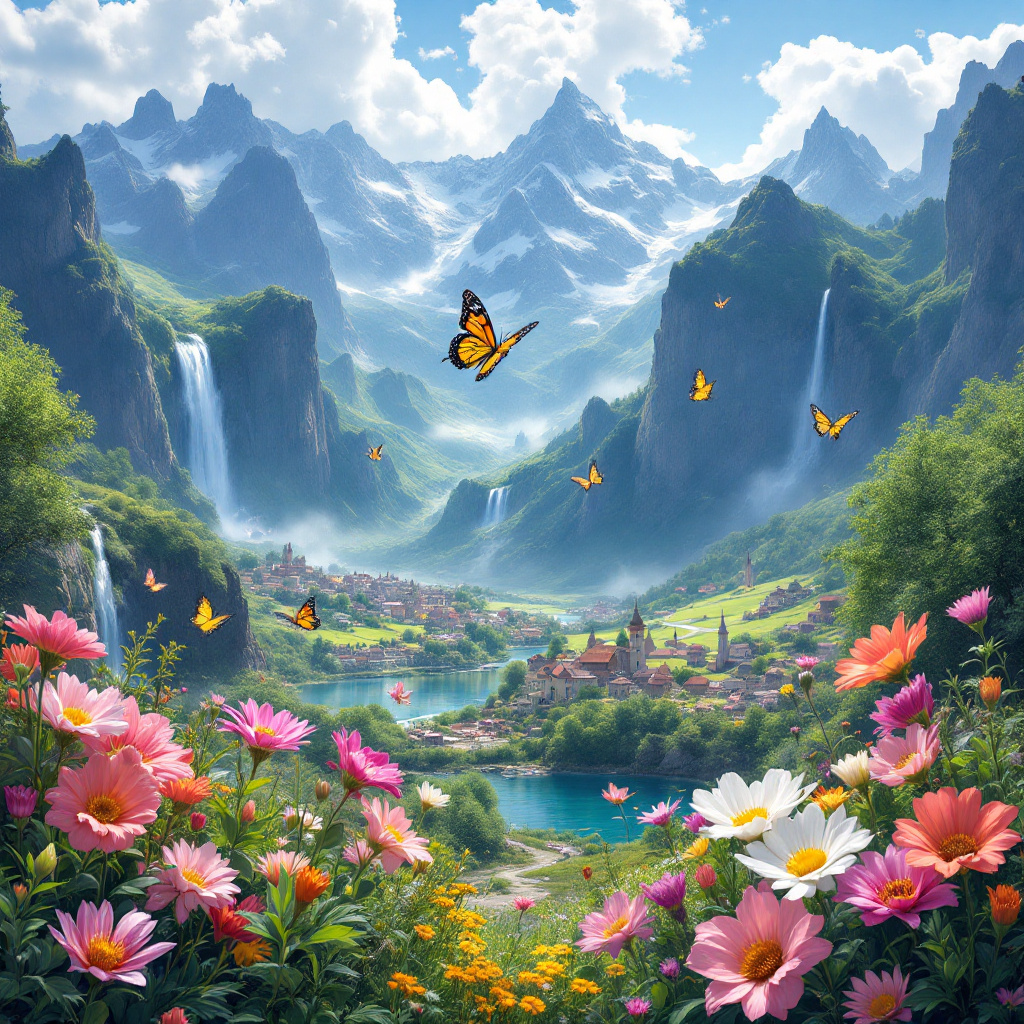

Image saved to: 'generated_image.png'


In [2]:
# Install required packages: `pip install requests pillow`
import os
import requests
import base64
from PIL import Image
from io import BytesIO
from IPython.display import display 

# You will need to set these environment variables or edit the following values.
endpoint = os.getenv("AZURE_OPENAI_ENDPOINT", "https://ats-aifoundry-resource.cognitiveservices.azure.com/openai/deployments/FLUX-1.1-pro/images/generations?api-version=2025-04-01-preview")
deployment = os.getenv("DEPLOYMENT_NAME", "FLUX-1.1-pro")
api_version = os.getenv("OPENAI_API_VERSION", "2025-04-01-preview")
subscription_key = os.getenv("AZURE_OPENAI_API_KEY")

def decode_and_save_image(b64_data, output_filename):
  image = Image.open(BytesIO(base64.b64decode(b64_data)))
  image.save(output_filename)
  display(image) 
 

def save_response(response_data, filename_prefix):
  data = response_data['data']
  b64_img = data[0]['b64_json']
  filename = f"{filename_prefix}.png"
  decode_and_save_image(b64_img, filename)
  print(f"Image saved to: '{filename}'")

base_path = f'openai/deployments/{deployment}/images'
params = f'?api-version={api_version}'

generation_url = f"https://ats-aifoundry-resource.cognitiveservices.azure.com/{base_path}/generations{params}"
generation_body = {
  "prompt": "Subject: A small town in the middle of heavenly mountains with massive waterfalls during pleasant sunny weather. Foreground: Magical flowers & plants with butterflies from heaven flying close to these flowers.",
  "n": 1,
  "size": "1024x1024",
  "output_format": "png"
}

generation_response = requests.post(
  generation_url,
  headers={
    'Api-Key': subscription_key,
    'Content-Type': 'application/json',
  },
  json=generation_body
).json()

generation_response

save_response(generation_response, "generated_image")